##Import modules

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

##Datasets

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
train_images.shape
# train_lables.shape

(60000, 28, 28)

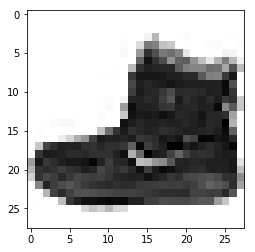

In [0]:
#plotting the first row
plt.imshow(train_images[0], cmap = plt.cm.binary)
plt.show()

In [0]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [0]:
#normalizing the datapoints
train_images = tf.keras.utils.normalize(train_images,axis = 1)
test_images = tf.keras.utils.normalize(test_images, axis = 1)


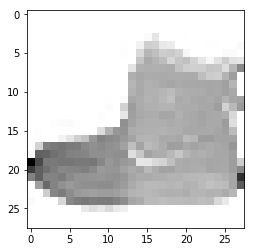

In [0]:
#Plotting the first row again
plt.imshow(train_images[0], cmap = plt.cm.binary)
plt.show()

In [0]:
print(train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00135942 0.    

In [0]:
train_images = train_images.astype('float32')                         

##Defining model

In [0]:
model = tf.keras.Sequential()

#Create 4 layers: input layer which is flattened contains 784 nodes, 2 hidden layers with 128 nodes, output layer with 10 nodes
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation = tf.nn.relu))
# model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation = tf.nn.relu))
# model.add(tf.keras.layers.Dense(32, activation = tf.nn.relu))
# model.add(tf.keras.layers.Dense(16, activation = tf.nn.relu))



model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

W0713 06:07:16.474008 140051772221312 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## Compiling model

In [0]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

##Training the model

In [0]:
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 10s 161us/sample - loss: 0.4974 - acc: 0.8148
Epoch 2/5
60000/60000 [==============================] - 9s 148us/sample - loss: 0.3668 - acc: 0.8652
Epoch 3/5
60000/60000 [==============================] - 9s 148us/sample - loss: 0.3333 - acc: 0.8767
Epoch 4/5
60000/60000 [==============================] - 9s 147us/sample - loss: 0.3051 - acc: 0.8854
Epoch 5/5
60000/60000 [==============================] - 9s 148us/sample - loss: 0.2873 - acc: 0.8935


##Testing the model

In [0]:
loss_val, accuracy_val = model.evaluate(train_images, train_labels)
print('Loss is ',loss_val)
print('Accuracy is ',accuracy_val)


60000/60000 [==============================] - 4s 73us/sample - loss: 0.2655 - acc: 0.8977
Loss is  0.26548350912481544
Accuracy is  0.89773333


##Predicting

In [0]:
predictions = model.predict([test_images])
predictions

array([[3.6173926e-08, 5.0580975e-09, 8.6335189e-10, ..., 3.9827940e-04,
        9.2952659e-09, 9.9949133e-01],
       [4.6599614e-03, 1.7915841e-05, 9.3392438e-01, ..., 2.1258437e-08,
        6.4316053e-05, 1.7802883e-09],
       [2.2076636e-06, 9.9999428e-01, 6.7536878e-09, ..., 1.5403865e-19,
        4.2140664e-09, 1.5511620e-16],
       ...,
       [7.4495059e-05, 2.3247749e-08, 3.1764635e-06, ..., 1.0200910e-06,
        9.9985051e-01, 1.7931382e-06],
       [5.7520028e-06, 9.9996603e-01, 1.0032942e-07, ..., 1.2823463e-16,
        9.3578151e-08, 4.0635718e-14],
       [4.8392440e-08, 1.2507155e-08, 2.7435577e-08, ..., 2.5493696e-03,
        2.9975281e-06, 6.9084526e-05]], dtype=float32)

In [0]:
print(predictions.shape)
print(predictions[0])

(10000, 10)
[3.6173926e-08 5.0580975e-09 8.6335189e-10 1.5881774e-09 2.9965652e-10
 1.1026840e-04 4.1689550e-09 3.9827940e-04 9.2952659e-09 9.9949133e-01]


In [0]:
prediction = np.argmax(predictions[0])
prediction

9

In [0]:
print(class_names[prediction])

Ankle boot


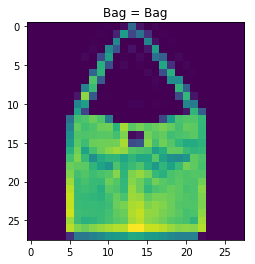

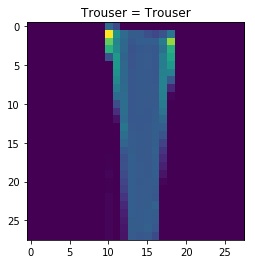

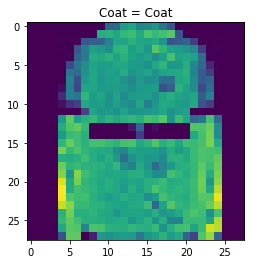

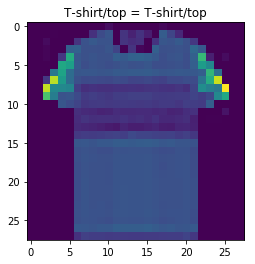

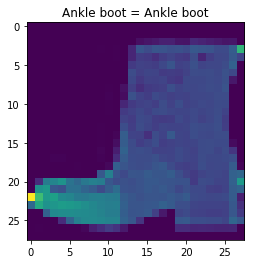

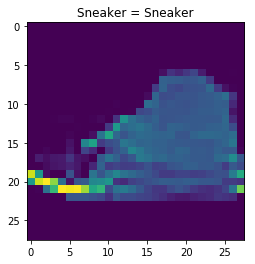

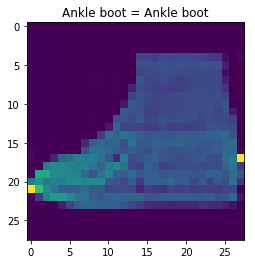

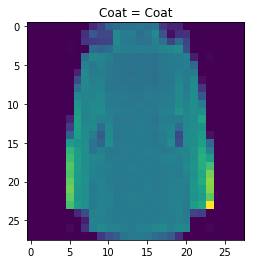

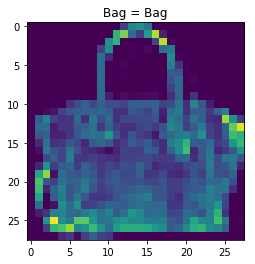

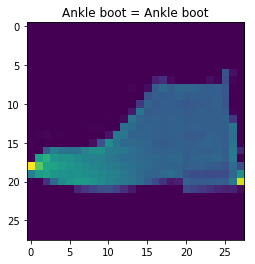

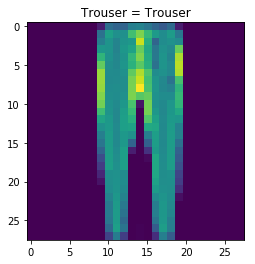

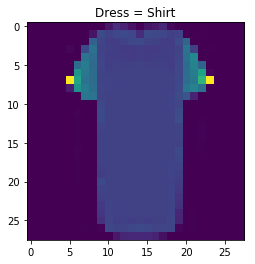

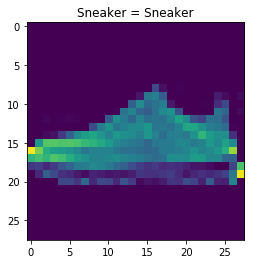

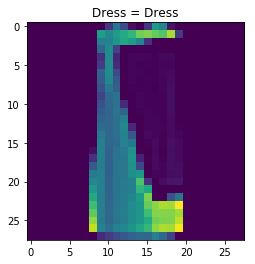

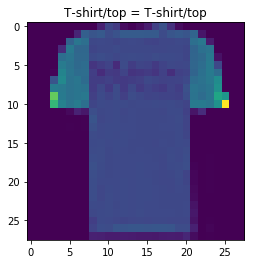

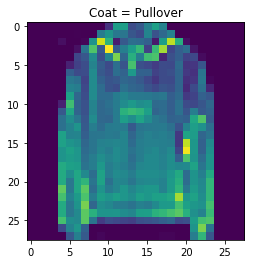

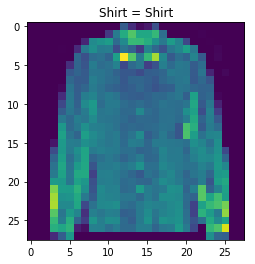

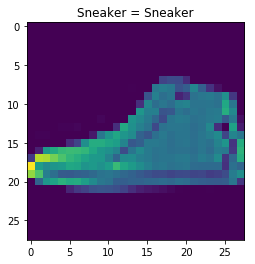

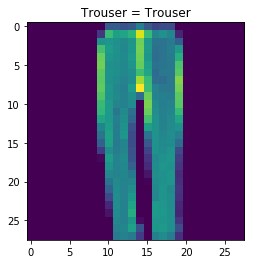

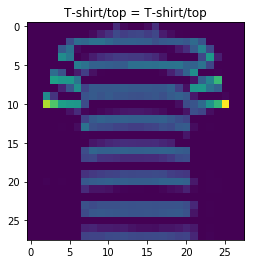

In [0]:
for i in range(700,720):
  prediction = np.argmax(predictions[i])
#   print(prediction)
  plt.figure()
  plt.title(str(class_names[prediction])+" = "+str(class_names[test_labels[i]]))
  plt.imshow(test_images[i])

plt.show()